In [13]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Literal
from numpy import array, ndarray, argsort, arange

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neural_network import MLPClassifier

import sys
sys.path.insert(1, '../../../utils')
from dslabs_functions import CLASS_EVAL_METRICS, DELTA_IMPROVE, plot_bar_chart, plot_multiline_chart, plot_evaluation_results, plot_horizontal_bar_chart, HEIGHT, plot_line_chart
from studies import naive_Bayes_study, logistic_regression_study, knn_study, trees_study, mlp_study, \
        run_all_nb, run_all_knn, run_all_lr, run_all_dt, run_all_mlp, run_all_rf, run_all_gb, \
        show_tree_and_importances_dt, show_importances_rf, show_importances_gb

import seaborn as sns

from matplotlib.pyplot import figure, savefig, show, subplots

import pandas as pd


In [14]:
df = pd.read_csv("../data/raw/traffic_accidents.csv")
df.head()

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
2,12/09/2021 10:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12
3,08/09/2023 07:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,5.0,0.0,0.0,5.0,0.0,0.0,19,4,8
4,08/19/2023 02:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,14,7,8


In [15]:
target_name = "crash_type"
file_tag = "traffic"
lab_folder = "lab1_baseline"
approach = "baseline"

target = df[target_name] #pulling target out before dropping non-numerics

features = df.drop(columns=[target_name])

features = features.dropna(axis=1, how="all") # dropping empty variables col-wise
features = features.dropna(axis=0, how="any") # dropping rows with any missing values

target = target.loc[features.index] #target and remaining rows aligned

features = features.select_dtypes(include=["number"]) #keeping only numeric cols

print(features.info())
print("Features shape:", features.shape)
print("Target shape:", target.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209306 entries, 0 to 209305
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   num_units                      209306 non-null  int64  
 1   injuries_total                 209306 non-null  float64
 2   injuries_fatal                 209306 non-null  float64
 3   injuries_incapacitating        209306 non-null  float64
 4   injuries_non_incapacitating    209306 non-null  float64
 5   injuries_reported_not_evident  209306 non-null  float64
 6   injuries_no_indication         209306 non-null  float64
 7   crash_hour                     209306 non-null  int64  
 8   crash_day_of_week              209306 non-null  int64  
 9   crash_month                    209306 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 16.0 MB
None
Features shape: (209306, 10)
Target shape: (209306,)


In [16]:
# train/test splitting
features_train, features_test, target_train, target_test = train_test_split(
    features,
    target,
    test_size=0.3,        #.7 train, .3 test
    random_state=42,      
    stratify=target       # keeps class proportions similar in train and test
)

binary_map = {
    "NO INJURY / DRIVE AWAY": 0,
    "INJURY AND / OR TOW DUE TO CRASH": 1
}

target_train = target_train.map(binary_map)
target_test = target_test.map(binary_map)

**NAIVE BAYES ANALYSIS - TRAFFIC DATA**

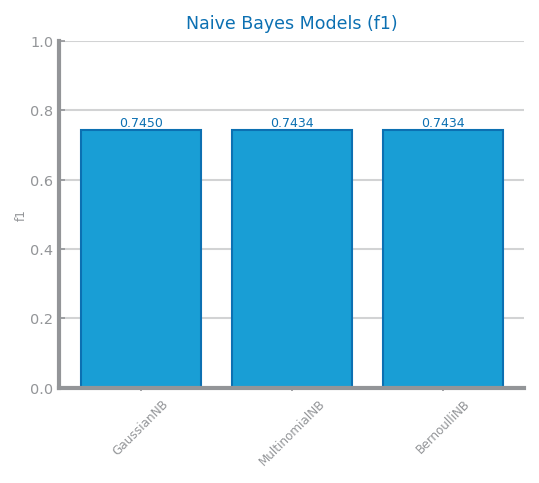

<Figure size 600x450 with 0 Axes>

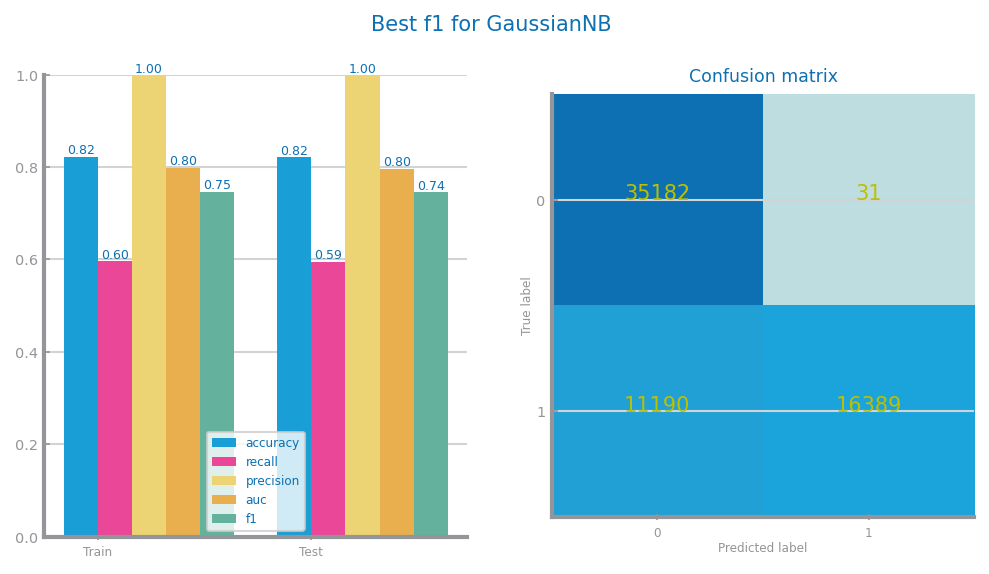

In [17]:
metrics = [#"accuracy", "recall", 
    "f1"] 
for el in metrics:
    nb_best_model, nb_params = run_all_nb(
        features_train, target_train, features_test, target_test, 
        lab_folder, file_tag, approach,
        eval_metric = el
    )

In [6]:
print(nb_best_model)
print(nb_params)

GaussianNB()
{'name': 'GaussianNB', 'metric': 'f1', 'params': (), 'f1': 0.7449714766244687}


In [ ]:
# GaussianNB()
# {'name': 'GaussianNB', 'metric': 'f1', 'params': (), 'f1': 0.7449714766244687}

**LOGISTIC REGRESSION ANALYSIS - TRAFFIC DATA**

LR best for 2000 iterations (penalty=l1)


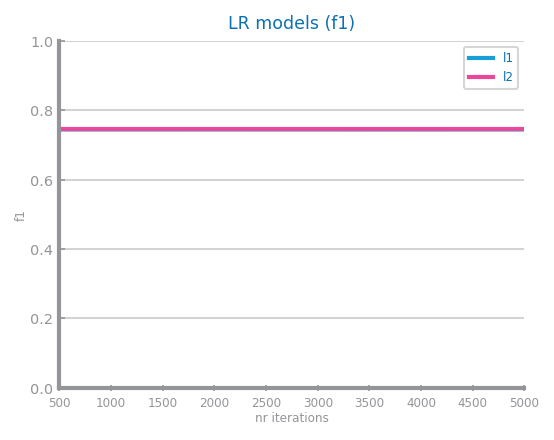

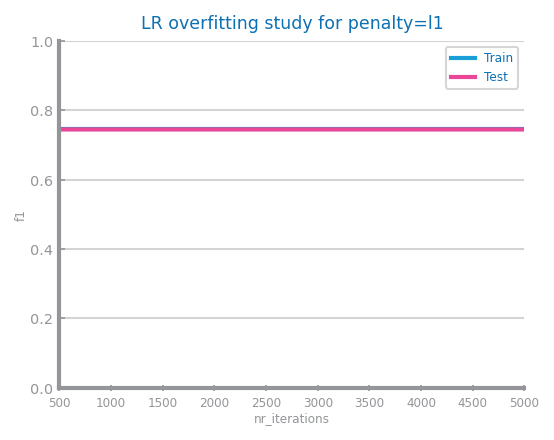

<Figure size 600x450 with 0 Axes>

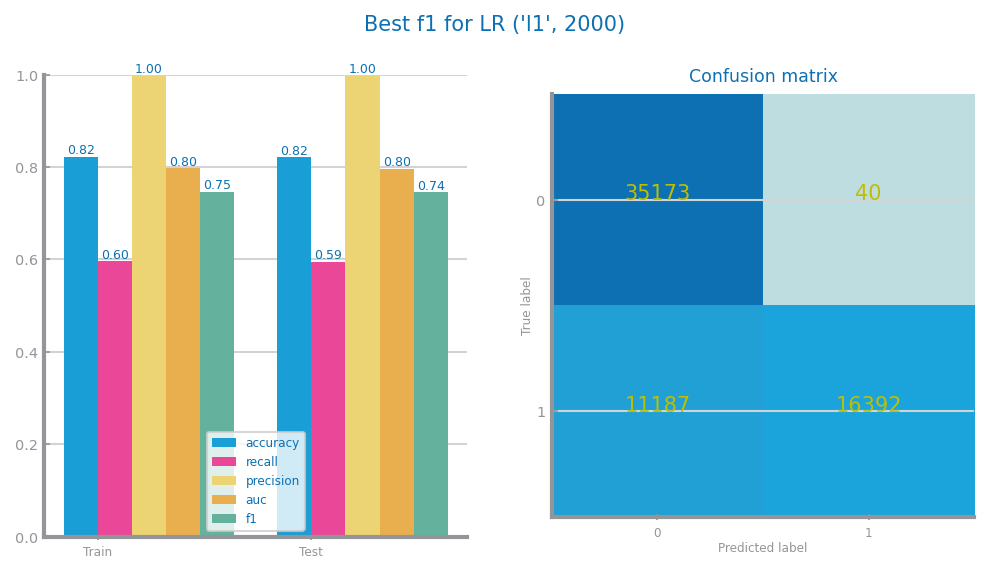

In [7]:
metrics = [#"accuracy", "recall", 
    "f1"] 
for el in metrics:
    lr_best_model, lr_params = run_all_lr(
        features_train, target_train, features_test, target_test, 
        lab_folder, file_tag, approach,
        nr_max_iterations=5000,
        lag=500,
        eval_metric = el
    )

In [8]:
print(lr_best_model)
print(lr_params)

LogisticRegression(max_iter=500, penalty='l1', solver='liblinear',
                   verbose=False, warm_start=True)
{'name': 'LR', 'metric': 'f1', 'params': ('l1', 2000)}


In [ ]:
# LogisticRegression(max_iter=500, penalty='l1', solver='liblinear',
#                    verbose=False, warm_start=True)
# {'name': 'LR', 'metric': 'f1', 'params': ('l1', 2000)}

**DECISION TREES ANALYSIS - TRAFFIC DATA**

DT best with entropy and d=7


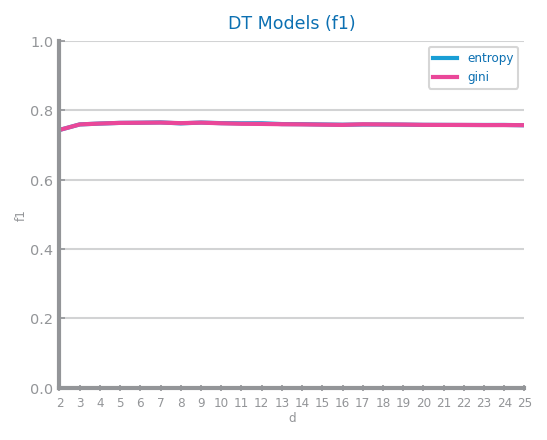

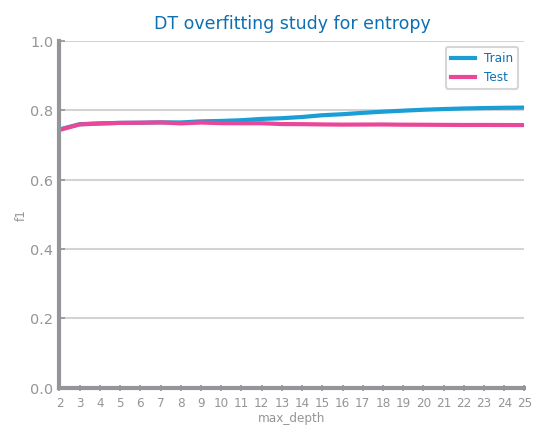

<Figure size 600x450 with 0 Axes>

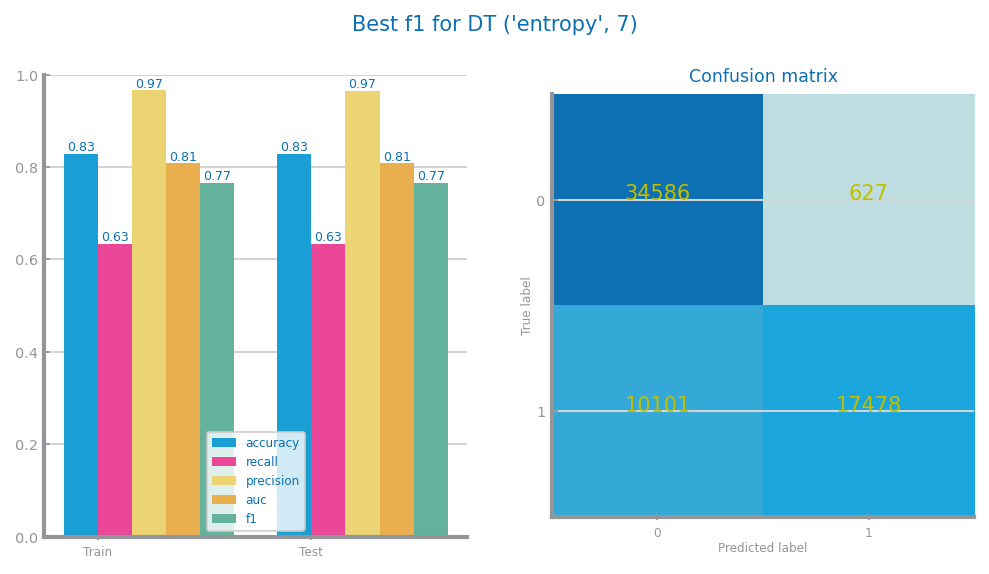

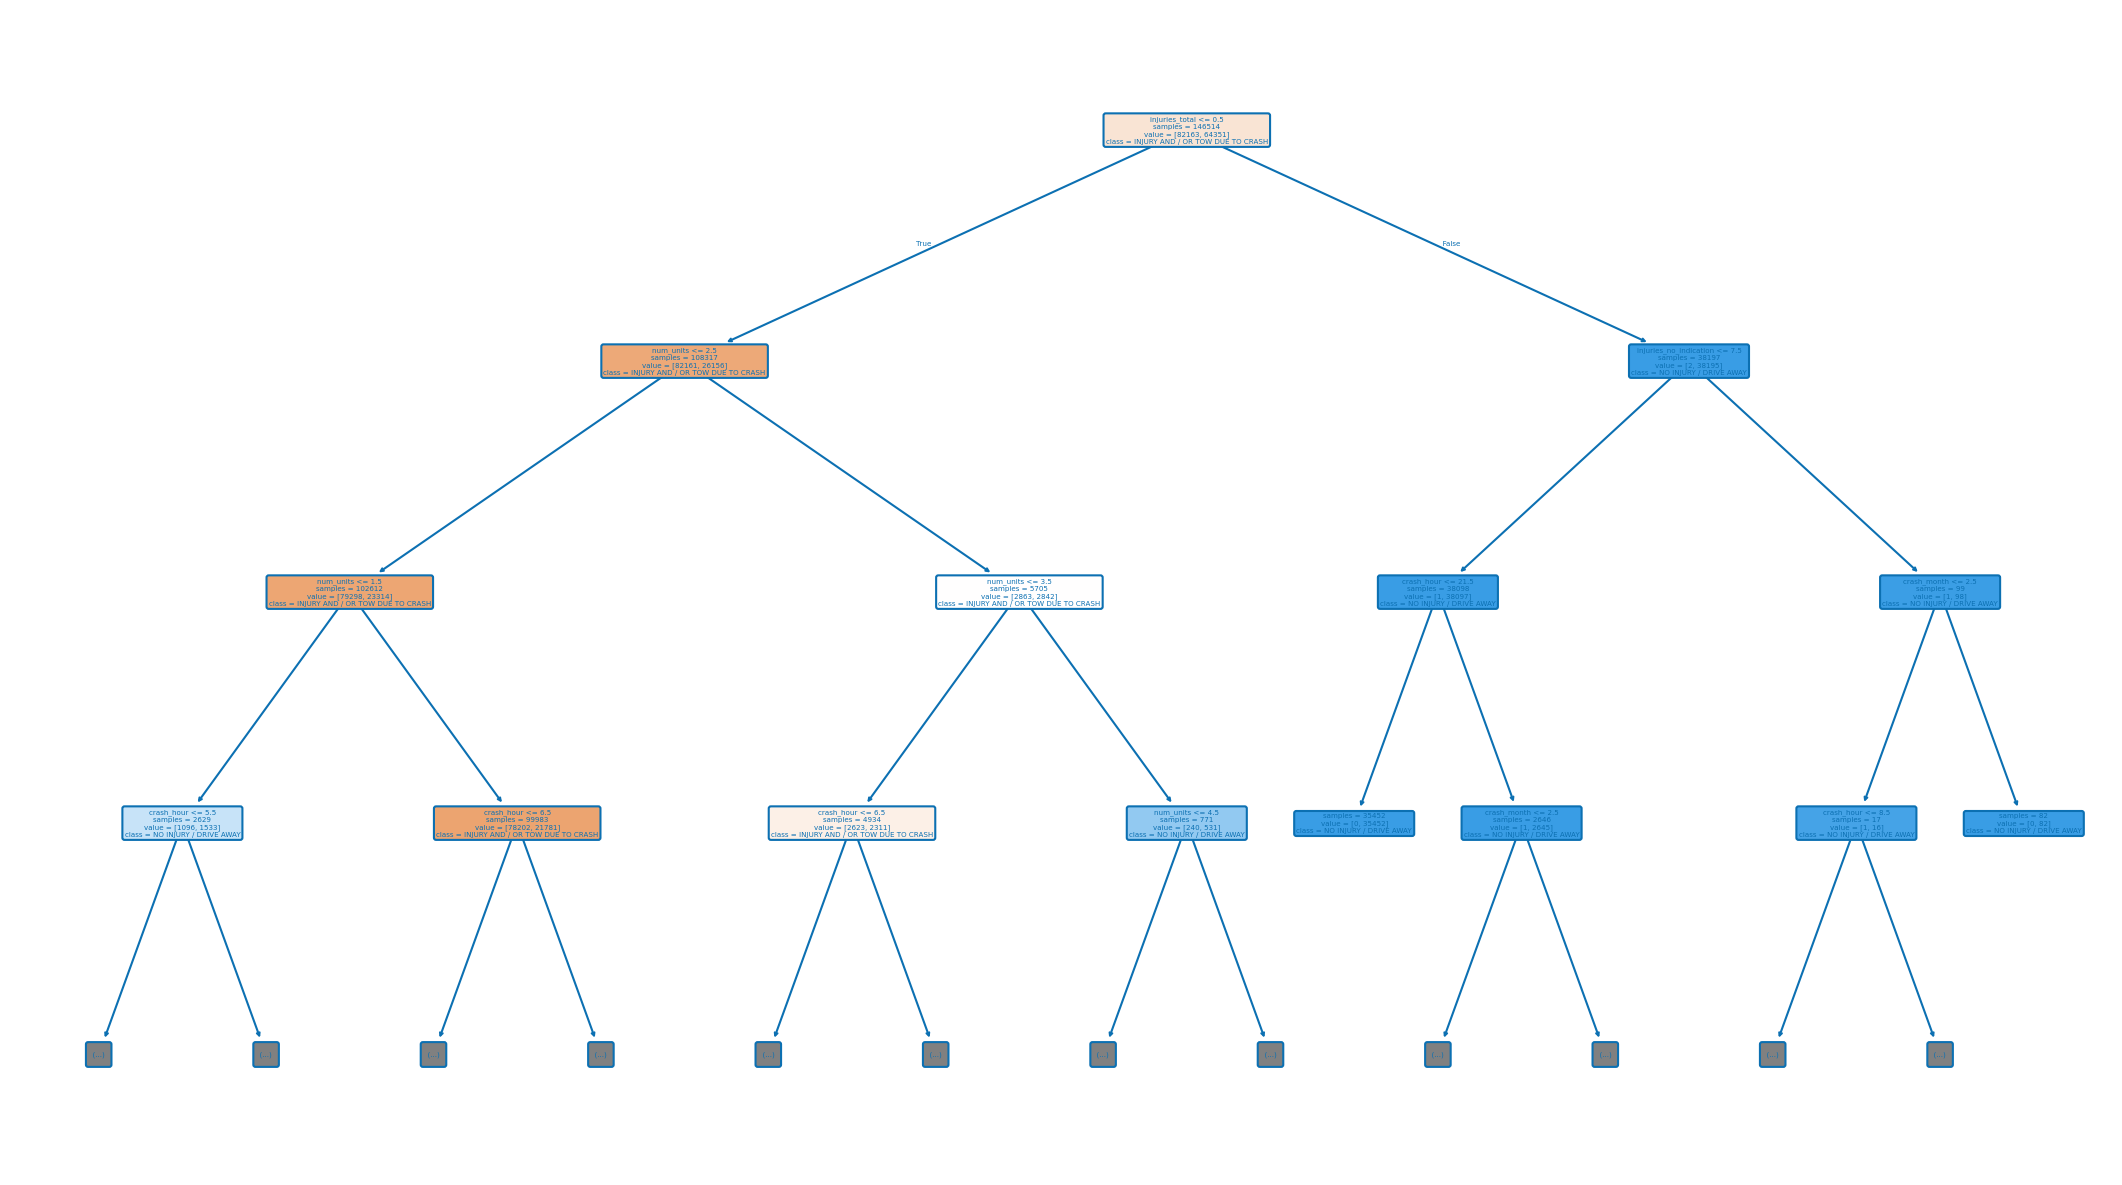

1. injuries_total (0.9287329264456957)
2. num_units (0.04135585517216447)
3. crash_hour (0.01999184559840342)
4. injuries_no_indication (0.008330902531476853)
5. crash_day_of_week (0.0008039802851752879)
6. crash_month (0.0007527576051730782)
7. injuries_non_incapacitating (3.173236191099333e-05)
8. injuries_reported_not_evident (0.0)
9. injuries_incapacitating (0.0)
10. injuries_fatal (0.0)


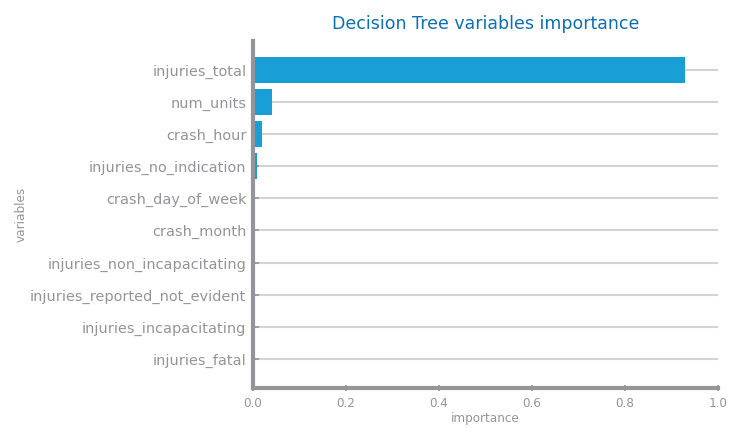

In [9]:
metrics = [#"accuracy", "recall", 
    "f1"] 
for el in metrics:
    dt_best_model, dt_params = run_all_dt(
        features_train, target_train, features_test, target_test, 
        lab_folder, file_tag, approach,
        d_max=25,
        lag=1,
        eval_metric = el
    )
    show_tree_and_importances_dt(
        features, target, dt_best_model, dt_params,
        lab_folder, file_tag, approach,
        max_depth2show=3
    )
    

In [10]:
print(dt_best_model)
print(dt_params)

DecisionTreeClassifier(criterion='entropy', max_depth=7,
                       min_impurity_decrease=0)
{'name': 'DT', 'metric': 'f1', 'params': ('entropy', 7)}


In [ ]:
# DecisionTreeClassifier(criterion='entropy', max_depth=7,
#                        min_impurity_decrease=0)
# {'name': 'DT', 'metric': 'f1', 'params': ('entropy', 7)}

**KNN ANALYSIS - TRAFFIC DATA**

KNN best with k=15 and manhattan


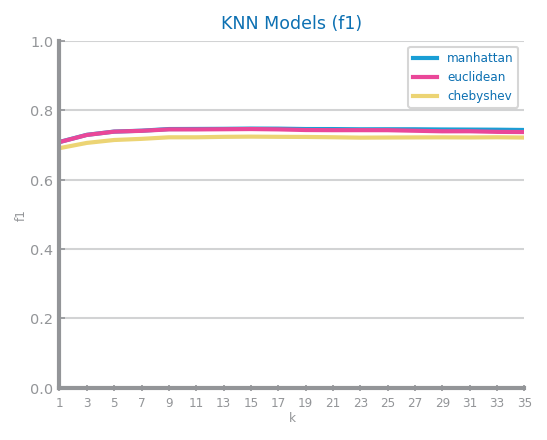

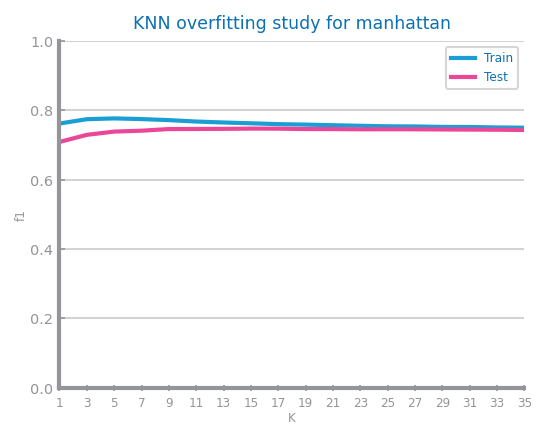

<Figure size 600x450 with 0 Axes>

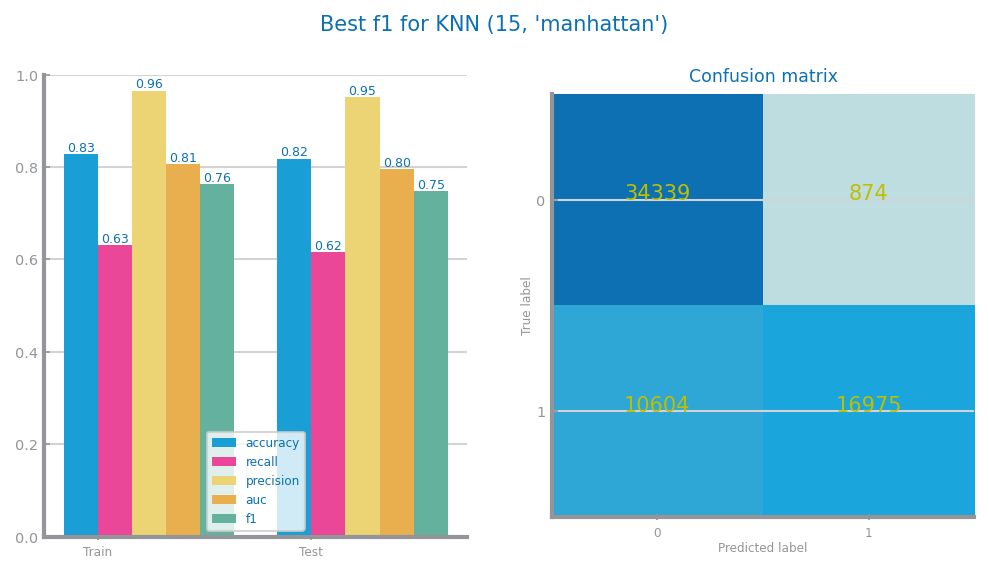

In [11]:
metrics = [#"accuracy", "recall", 
    "f1"] 
for el in metrics:
    knn_best_model, knn_params = run_all_knn(
        features_train, target_train, features_test, target_test, 
        lab_folder, file_tag, approach,
        k_max=35,
        lag=2,
        eval_metric = el
    )

In [12]:
print(knn_best_model)
print(knn_params)

KNeighborsClassifier(metric='manhattan', n_neighbors=15)
{'name': 'KNN', 'metric': 'f1', 'params': (15, 'manhattan')}


In [ ]:
# KNeighborsClassifier(metric='manhattan', n_neighbors=15)
# {'name': 'KNN', 'metric': 'f1', 'params': (15, 'manhattan')}

**MLP ANALYSIS - TRAFFIC DATA**

MLP best for 2000 iterations (lr_type=adaptive and lr=0.05) with f1=0.763734


<Figure size 600x450 with 0 Axes>

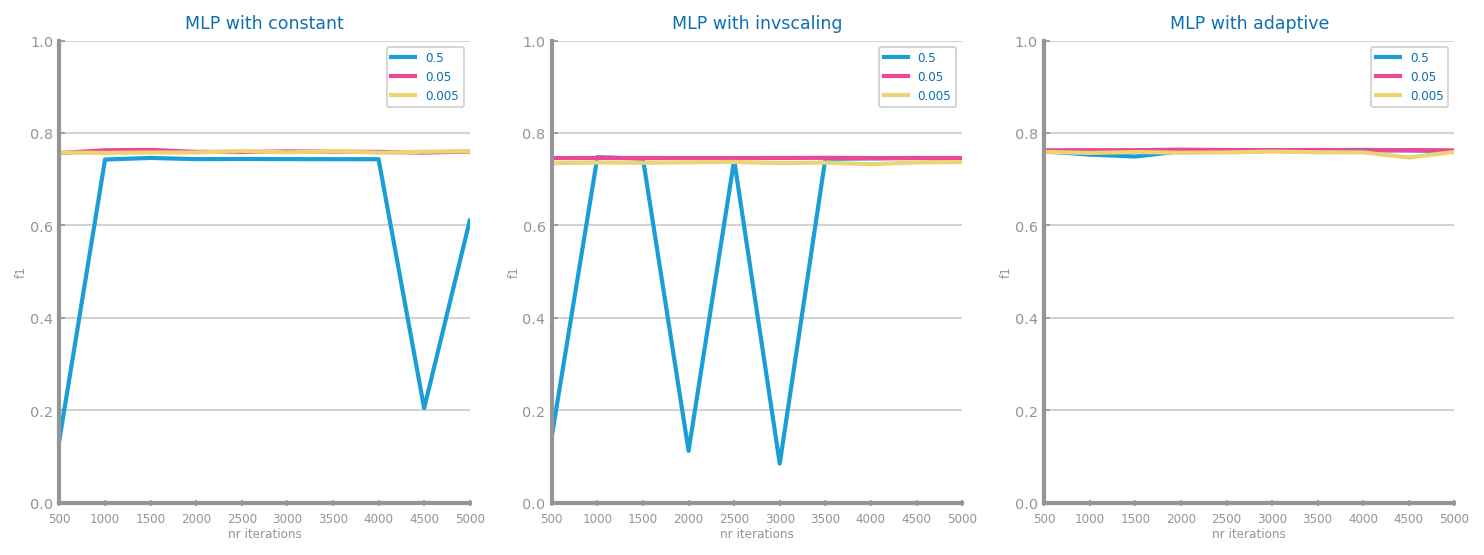

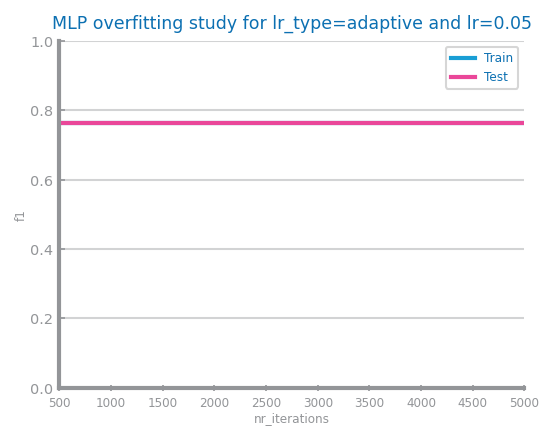

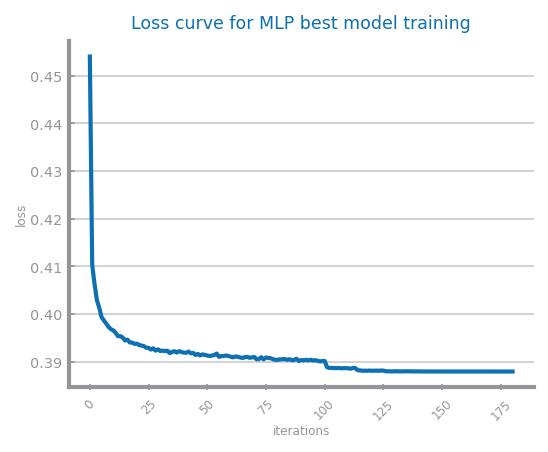

<Figure size 600x450 with 0 Axes>

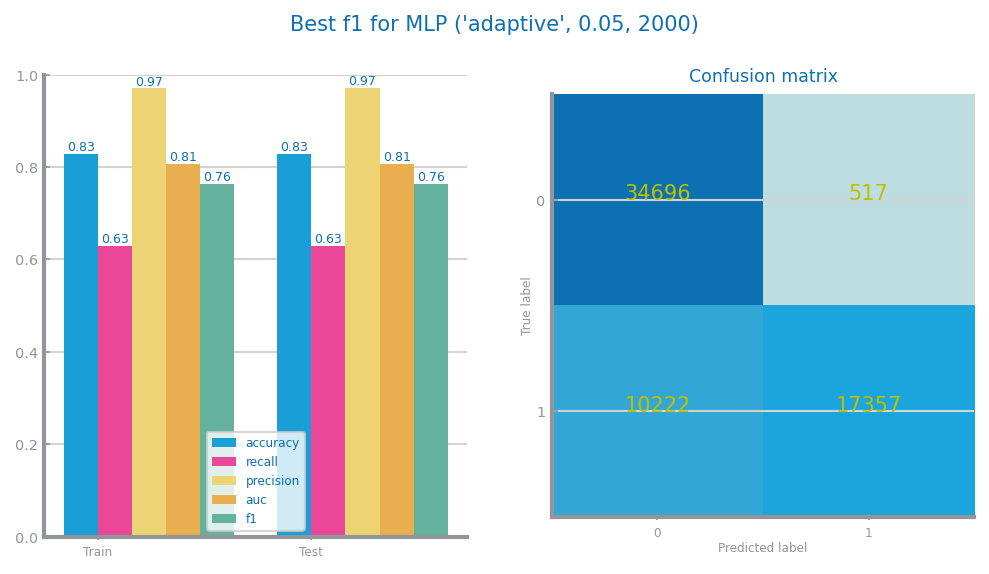

In [10]:
metrics = [#"accuracy", "recall", 
    "f1"] 
for el in metrics:
    mlp_best_model, mlp_params = run_all_mlp(
        features_train, target_train, features_test, target_test, 
        lab_folder, file_tag, approach,
        nr_max_iterations=5000,
        lag=500,
        eval_metric = el
    )

In [25]:
print(mlp_best_model)
print(mlp_params)

MLPClassifier(activation='logistic', learning_rate='adaptive',
              learning_rate_init=0.05, max_iter=500, solver='sgd',
              warm_start=True)
{'name': 'MLP', 'metric': 'f1', 'params': ('adaptive', 0.05, 2000)}


In [ ]:
# MLPClassifier(activation='logistic', learning_rate='adaptive',
#               learning_rate_init=0.05, max_iter=500, solver='sgd',
#               warm_start=True)
# {'name': 'MLP', 'metric': 'f1', 'params': ('adaptive', 0.05, 2000)}

**RANDOM FORESTS - TRAFFIC DATA**

RF best for 1000 trees (d=7 and f=0.7)


<Figure size 600x450 with 0 Axes>

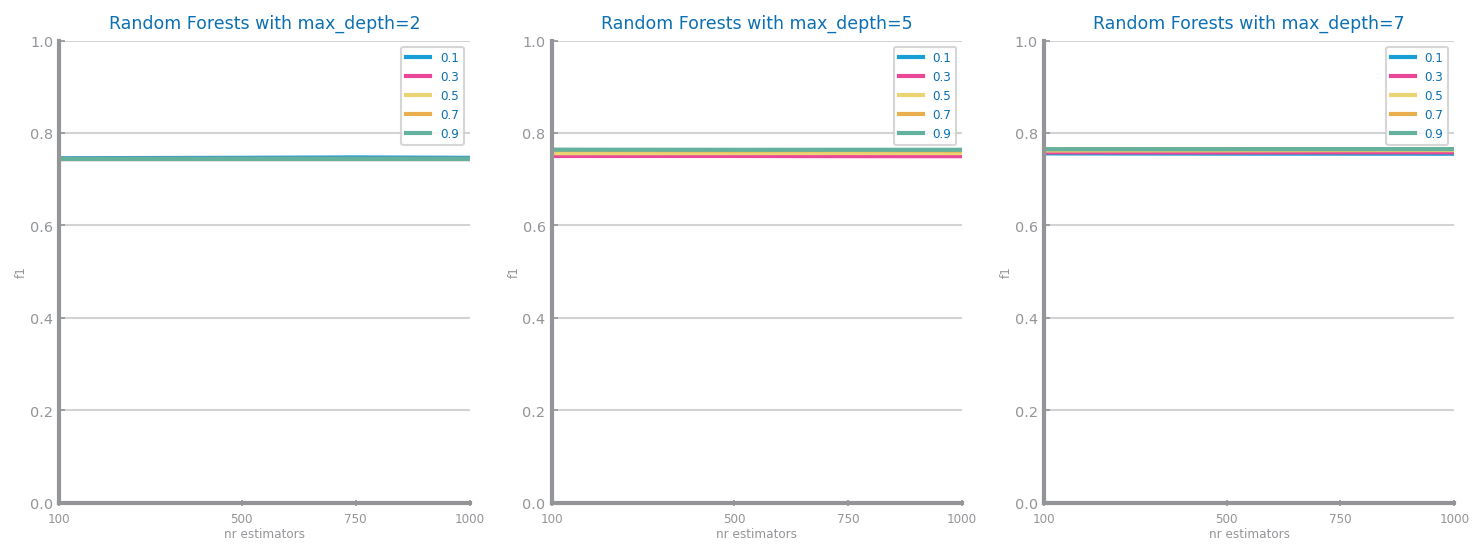

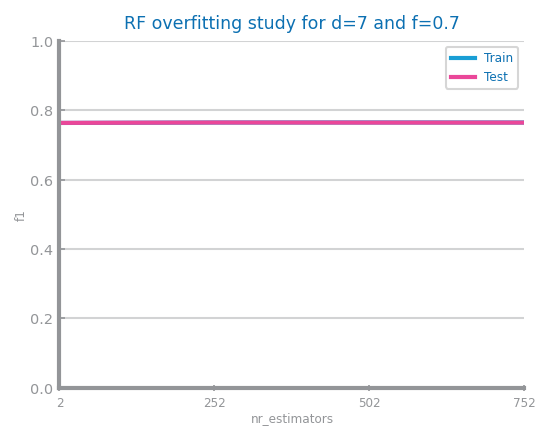

<Figure size 600x450 with 0 Axes>

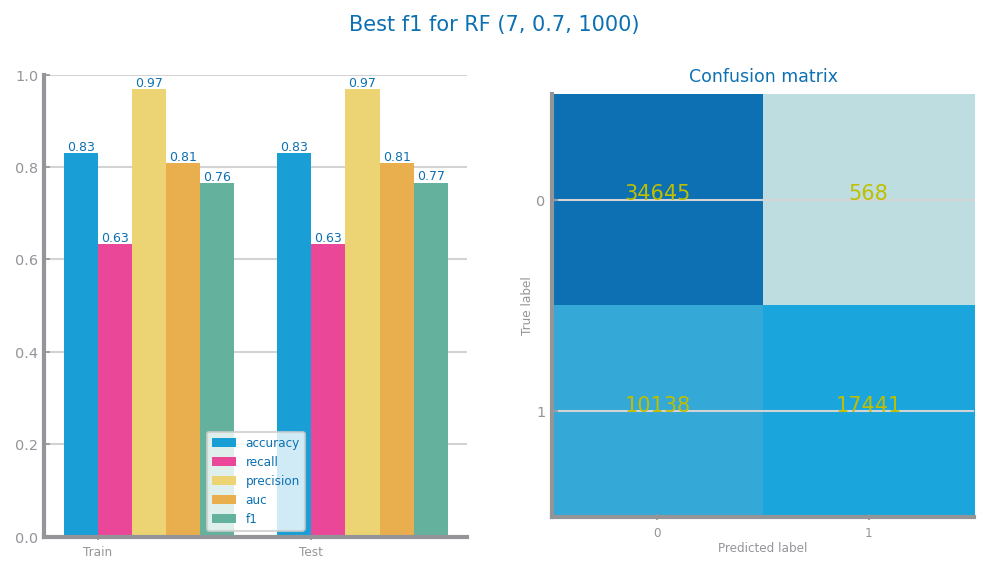

1. injuries_total (0.7467480894181112)
2. injuries_non_incapacitating (0.13316129870204876)
3. num_units (0.04056397498630593)
4. injuries_no_indication (0.03282698068901508)
5. injuries_reported_not_evident (0.022687192843729914)
6. crash_hour (0.019759643229731953)
7. injuries_incapacitating (0.002222457101260548)
8. crash_day_of_week (0.0011603285987438932)
9. crash_month (0.0008572411866058135)
10. injuries_fatal (1.2793244446811415e-05)


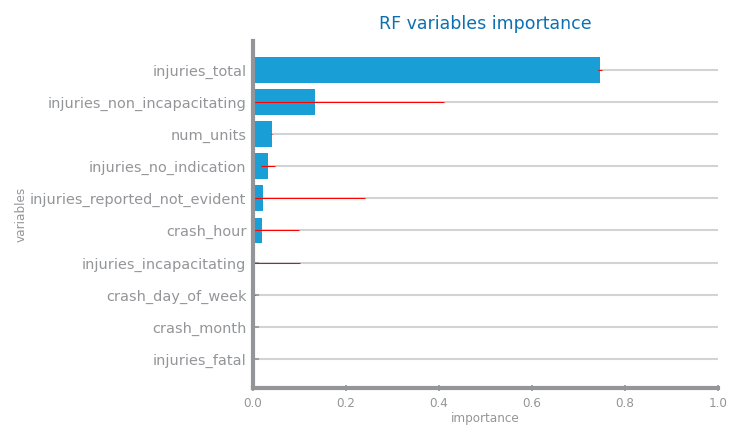

In [8]:
metrics = [#"accuracy", "recall", 
    "f1"] 
for el in metrics:
    rf_best_model, rf_params = run_all_rf(
        features_train, target_train, features_test, target_test, 
        lab_folder, file_tag, approach,
        nr_max_trees=1000,
        lag=250,
        eval_metric = el
    )
    show_importances_rf(features,
        rf_best_model, rf_params,
        lab_folder, file_tag, approach
    )

In [23]:
print(rf_best_model)
print(rf_params)

RandomForestClassifier(max_depth=7, max_features=0.7, n_estimators=1000)
{'name': 'RF', 'metric': 'f1', 'params': (7, 0.7, 1000)}


In [ ]:
# RandomForestClassifier(max_depth=7, max_features=0.7, n_estimators=1000)
# {'name': 'RF', 'metric': 'f1', 'params': (7, 0.7, 1000)}

**GRADIENT BOOSTING OR XGBOOST - TRAFFIC DATA**

GB best for 500 trees (d=2 and lr=0.3


<Figure size 600x450 with 0 Axes>

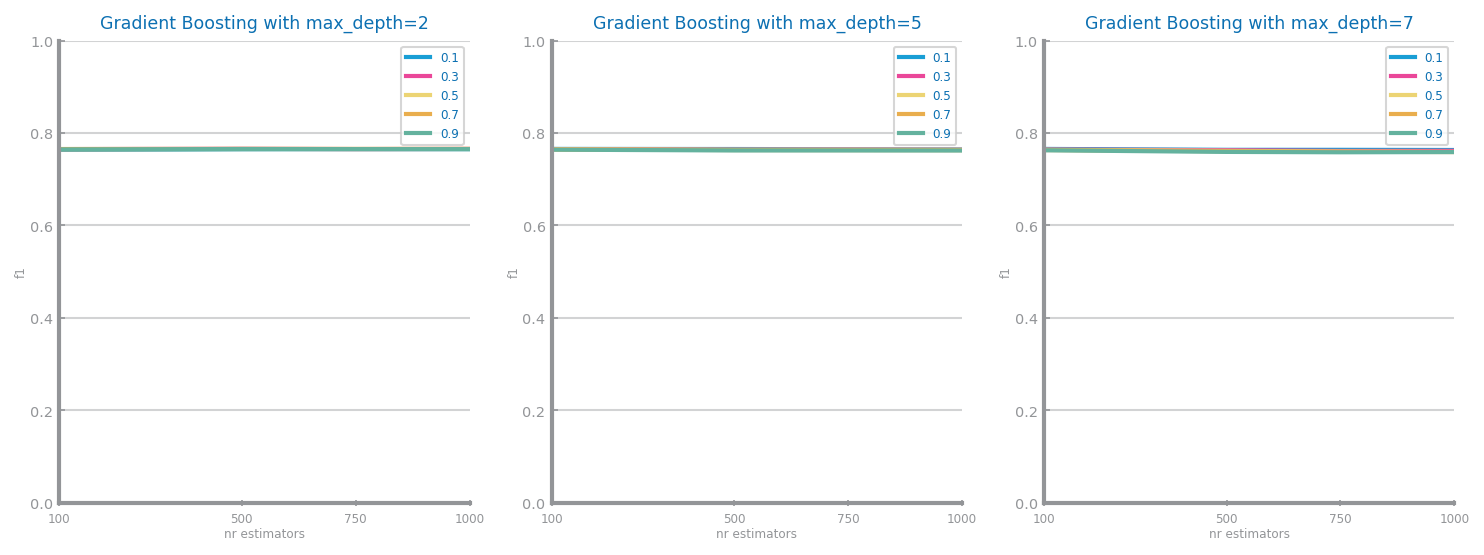

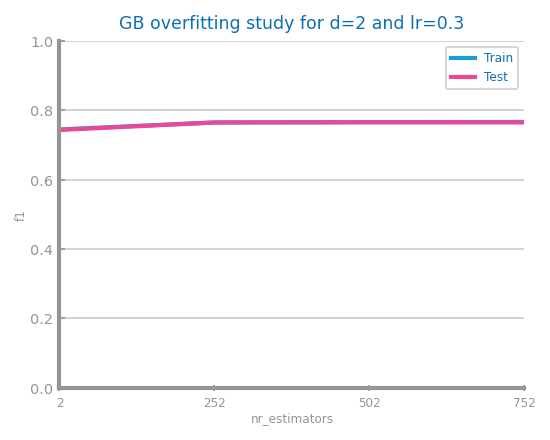

<Figure size 600x450 with 0 Axes>

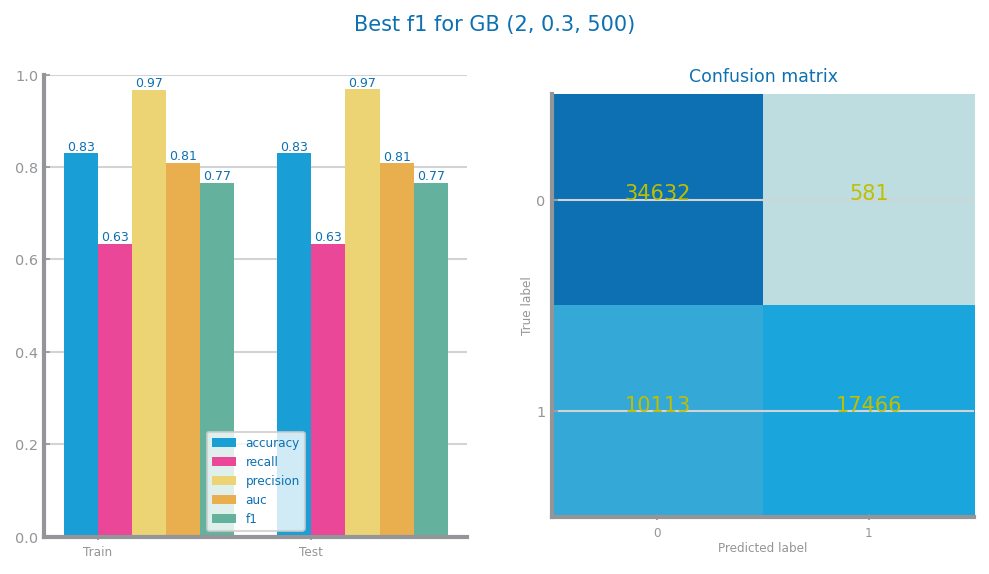

1. injuries_total (0.9301470375491562)
2. num_units (0.04052496383167831)
3. crash_hour (0.02000943763324783)
4. injuries_no_indication (0.007023973311369255)
5. crash_day_of_week (0.0016834992522234097)
6. crash_month (0.0006110884223250691)
7. injuries_reported_not_evident (0.0)
8. injuries_non_incapacitating (0.0)
9. injuries_incapacitating (0.0)
10. injuries_fatal (0.0)


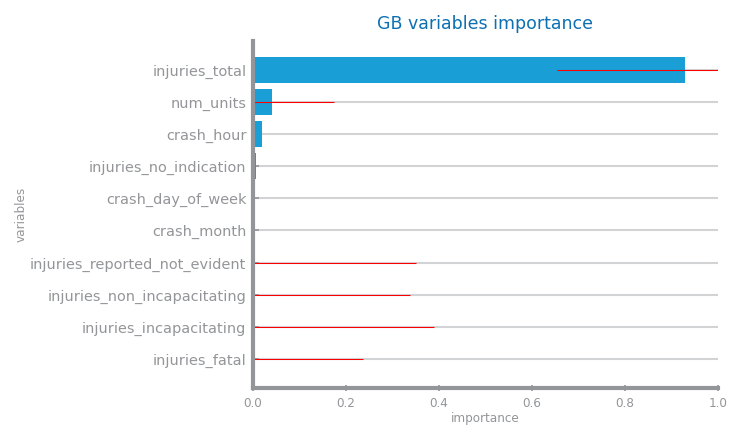

In [9]:
metrics = [#"accuracy", "recall", 
    "f1"] 
for el in metrics:
    gb_best_model, gb_params = run_all_gb(
        features_train, target_train, features_test, target_test, 
        lab_folder, file_tag, approach,
        nr_max_trees=1000,
        lag=250,
        eval_metric = el
    )
    show_importances_gb(features,
        gb_best_model, gb_params,
        lab_folder, file_tag, approach
    )


In [24]:
print(gb_best_model)
print(gb_params)

GradientBoostingClassifier(learning_rate=0.3, max_depth=2, n_estimators=500)
{'name': 'GB', 'metric': 'f1', 'params': (2, 0.3, 500)}


In [ ]:
# GradientBoostingClassifier(learning_rate=0.3, max_depth=2, n_estimators=500)
# {'name': 'GB', 'metric': 'f1', 'params': (2, 0.3, 500)}